In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import scipy.stats

# Combining Phon , Conc, Affectiveness

In [ ]:
df_conc = pd.read_csv("../data/colex/colex_pron_wn#1_conc.csv")

In [5]:
df = pd.read_csv("../data/finals/colex_wn_pron_aff.csv")

In [6]:
df

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,diff,lang,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,LANG_PRON,LANG_NAME,LEN,lemma_lang,PRON
0,tropidoclonion_lineatum,BG,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,bg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bul,Bulgarian,3.0,tropidoclonion_lineatum_bul,NaN
1,tropidoclonion_lineatum,RU,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rus,Russian,3.0,tropidoclonion_lineatum_rus,NaN
2,tropidoclonion_lineatum,UK,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukr,Ukrainian,3.0,tropidoclonion_lineatum_ukr,NaN
3,tropidoclonion_lineatum,GA,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gle,Irish,3.0,tropidoclonion_lineatum_gle,NaN
4,tropidoclonion_lineatum,RO,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ron,Romanian; Moldavian; Moldovan,3.0,tropidoclonion_lineatum_ron,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980467,menuil,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuil_msa,NaN
1980468,menuas,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuas_msa,NaN
1980469,menuil,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuil_ind,NaN
1980470,menuas,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuas_ind,NaN


In [ ]:
df_aff= pd.read_csv("../data/affectiveness/wn_colex_wkb.csv")

In [ ]:
df_conc.head()

In [ ]:
df_aff.head()

In [ ]:
df_aff.drop(["diff"], axis=1, inplace=True)

In [ ]:
df_conc.drop(["diff"], axis=1, inplace=True)

In [ ]:
len(df_aff), len(df_conc)

In [ ]:
df= pd.merge(df_conc, df_aff, how="outer", on=["SENSE_LEMMA", "LANG", "SYNSET1", "SYNSET2", "C1", "C2", "lang"])

In [ ]:
df

In [ ]:
df["diff"]=df["C1"]!=df["C2"]

In [ ]:
df= df[df["diff"]==True]

In [ ]:
len(df)

In [7]:
df["COLEX"]= df["C1"]+"~"+df["C2"]

In [8]:
df_concrete = pd.read_csv("../data/wordlists/concreteness_ratings.csv")

In [9]:
df_concrete["lemma"] = df_concrete["Word"].replace(' ', '_', regex=True).str.lower()

In [10]:
df_concrete.head(2)

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,lemma
0,a,0,1.46,1.14,2,30,0.93,1041179,a
1,aardvark,0,4.68,0.86,0,28,1.00,21,aardvark


In [11]:
conc_percent_known =  dict(zip(df_concrete["lemma"], df_concrete["Percent_known"]))

In [12]:
conc_sd = dict(zip(df_concrete["lemma"], df_concrete["Conc.SD"]))

In [13]:
conc_m = dict(zip(df_concrete["lemma"], df_concrete["Conc.M"]))

In [14]:
df["Conc.SD.1"] = df["C1"].parallel_apply(lambda x: conc_sd.get(x,np.NaN))
df["Conc.SD.2"] = df["C2"].parallel_apply(lambda x: conc_sd.get(x,np.NaN))

In [15]:
df["Conc.M.1"] = df["C1"].parallel_apply(lambda x: conc_m.get(x,np.NaN))
df["Conc.M.2"] = df["C2"].parallel_apply(lambda x: conc_m.get(x,np.NaN))

In [16]:
df["Conc.Percent_Known.1"] = df["C1"].parallel_apply(lambda x: conc_percent_known.get(x,np.NaN))
df["Conc.Percent_Known.2"] = df["C2"].parallel_apply(lambda x: conc_percent_known.get(x,np.NaN))

In [30]:
df

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,diff,lang,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,LANG_PRON,LANG_NAME,LEN,lemma_lang,PRON,COLEX,Conc.SD.1,Conc.SD.2,Conc.M.1,Conc.M.2,Conc.Percent_Known.1,Conc.Percent_Known.2,D.Dist,A.Dist,V.Dist,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.Dist,Conc.SD.Dist
0,tropidoclonion_lineatum,BG,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,bg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bul,Bulgarian,3.0,tropidoclonion_lineatum_bul,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropidoclonion_lineatum,RU,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rus,Russian,3.0,tropidoclonion_lineatum_rus,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropidoclonion_lineatum,UK,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukr,Ukrainian,3.0,tropidoclonion_lineatum_ukr,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tropidoclonion_lineatum,GA,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gle,Irish,3.0,tropidoclonion_lineatum_gle,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tropidoclonion_lineatum,RO,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ron,Romanian; Moldavian; Moldovan,3.0,tropidoclonion_lineatum_ron,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980467,menuil,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuil_msa,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980468,menuas,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuas_msa,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980469,menuil,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuil_ind,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980470,menuas,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuas_ind,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24


In [19]:
df["D.Dist"] = df["C1.D.Mean.Sum"]-df["C2.D.Mean.Sum"]
df["A.Dist"] = df["C1.A.Mean.Sum"]-df["C2.A.Mean.Sum"]
df["V.Dist"]=df["C1.V.Mean.Sum"]-df["C2.V.Mean.Sum"]

df["D.SD.Dist"] = df["C1.D.SD.Sum"]-df["C2.D.SD.Sum"]
df["A.SD.Dist"] = df["C1.A.SD.Sum"]-df["C2.A.SD.Sum"]
df["V.SD.Dist"]=df["C1.V.SD.Sum"]-df["C2.V.SD.Sum"]

df["Conc.Dist"]=df["Conc.M.1"]-df["Conc.M.2"]
df["Conc.SD.Dist"]=df["Conc.SD.1"]-df["Conc.SD.2"]


In [20]:
df["Conc.Dist"] = df["Conc.Dist"].abs()
df["Conc.SD.Dist"]= df["Conc.SD.Dist"].abs()

df["A.Dist"]=df["A.Dist"].abs()
df["V.Dist"]=df["V.Dist"].abs()
df["D.Dist"]=df["D.Dist"].abs()

df["D.SD.Dist"] = df["D.SD.Dist"].abs()
df["A.SD.Dist"] = df["A.SD.Dist"].abs()
df["V.SD.Dist"]=df["V.SD.Dist"].abs()

In [32]:
df.to_csv("../data/colex_wn_phon_aff_conc.csv", index=False)

# correlations

In [31]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [33]:
df

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,diff,lang,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,LANG_PRON,LANG_NAME,LEN,lemma_lang,PRON,COLEX,Conc.SD.1,Conc.SD.2,Conc.M.1,Conc.M.2,Conc.Percent_Known.1,Conc.Percent_Known.2,D.Dist,A.Dist,V.Dist,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.Dist,Conc.SD.Dist
0,tropidoclonion_lineatum,BG,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,bg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bul,Bulgarian,3.0,tropidoclonion_lineatum_bul,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropidoclonion_lineatum,RU,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rus,Russian,3.0,tropidoclonion_lineatum_rus,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropidoclonion_lineatum,UK,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukr,Ukrainian,3.0,tropidoclonion_lineatum_ukr,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tropidoclonion_lineatum,GA,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gle,Irish,3.0,tropidoclonion_lineatum_gle,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tropidoclonion_lineatum,RO,Tropidoclonion#n#1,lined_snake#n#1,tropidoclonion,lined_snake,True,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ron,Romanian; Moldavian; Moldovan,3.0,tropidoclonion_lineatum_ron,NaN,tropidoclonion~lined_snake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980467,menuil,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuil_msa,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980468,menuas,MS,jack#v#1,pry#v#1,jack,pry,True,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,msa,Malay (macrolanguage),3.0,menuas_msa,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980469,menuil,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuil_ind,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24
1980470,menuas,ID,jack#v#1,pry#v#1,jack,pry,True,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pry,3.57,1.86,21.0,5.3,2.58,20.0,4.85,2.25,20.0,ind,Indonesian,3.0,menuas_ind,NaN,jack~pry,1.15,1.39,4.3,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.24


In [41]:
def correlation(X_df):
    X = X_df.index.values
    Y = X_df["#COLEX"].values
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
    

In [96]:

def heatmap(x, y, size):
    plt.rcParams['figure.figsize'] = [8, 8]
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.savefig("corr-aff-conc.png")

In [97]:
columns = ["Conc.Dist", "V.Dist", "A.Dist", "D.Dist"]

In [98]:
df_ratings = df[["Conc.Dist", "V.Dist", "A.Dist", "D.Dist"]]

In [99]:
corr = df_ratings.corr()

In [100]:
corr = pd.melt(corr.reset_index(), id_vars='index')

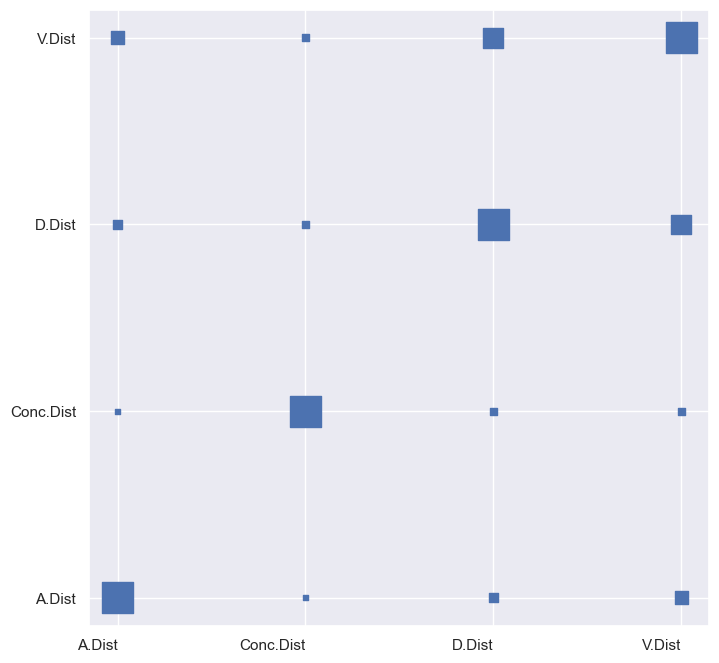

In [101]:
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [69]:
df_ratings.corr()

,Conc.Dist,V.Dist,A.Dist,D.Dist
Conc.Dist,1.000000,0.050893,0.025639,0.052433
V.Dist,0.050893,1.000000,0.175317,0.409322
A.Dist,0.025639,0.175317,1.000000,0.085806
D.Dist,0.052433,0.409322,0.085806,1.000000


# Count colexification by languages

In [62]:
def correlation(X_df):
    sns.set(rc={'figure.figsize':(20,20)})
    X = X_df.index.values
    print(X.shape)
    Y = X_df["#LANGS"].values
    print(Y.shape)
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
  

In [63]:
def ratings_dist_lang(df, dist):
    df = df.dropna(subset=[dist])
    colex_condist = dict(zip(df["COLEX"],df[dist]))
    colex_lang_counter = defaultdict(dict)
    for lang, colex in zip(df["LANG_PRON"], df["COLEX"]):
        if colex not in colex_lang_counter:
            colex_lang_counter[colex]=defaultdict(int)

        colex_lang_counter[colex][lang]+=1
    
    colex_langs = {k:len(v) for k,v in colex_lang_counter.items()}
    
    df_colex_lang= pd.DataFrame.from_dict(colex_langs, orient="index")
    df_colex_lang.columns = ["langs"]
    df_colex_lang["COLEX"] = df_colex_lang.index
    df_colex_lang[dist] = df_colex_lang["COLEX"].parallel_apply(lambda x: colex_condist[x])
    
    X_langs = pd.DataFrame.from_dict(df_colex_lang.groupby(dist)["langs"].agg("sum").to_dict(), orient="index").rename(columns={0:"#LANGS"})
    X_langs[dist]=X_langs.index
    
    correlation(X_langs)
    

In [64]:
ratings_dist_lang(df, "Conc.Dist")

(1351,)
(1351,)
correlation: PearsonRResult(statistic=-0.4726570993226803, pvalue=3.958663238466222e-76)


In [65]:
ratings_dist_lang(df, "V.Dist")

(1954,)
(1954,)
correlation: PearsonRResult(statistic=-0.41780782384868265, pvalue=2.07944327618334e-83)


In [66]:
ratings_dist_lang(df, "A.Dist")

(1381,)
(1381,)
correlation: PearsonRResult(statistic=-0.5797677777750032, pvalue=7.837178398274014e-125)


In [67]:
ratings_dist_lang(df, "D.Dist")

(1346,)
(1346,)
correlation: PearsonRResult(statistic=-0.5090322708889039, pvalue=1.2676154324098422e-89)


# all colex

In [50]:
def ratings_dist_all(df, dist):
    X_all = pd.DataFrame.from_dict(df.groupby(dist).agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
    X_all[dist]=X_all.index
    correlation(X_all)

In [53]:
ratings_dist_all(df, "Conc.Dist")

correlation: PearsonRResult(statistic=-0.471565184371595, pvalue=9.70924573461412e-76)


In [54]:
ratings_dist_all(df, "V.Dist")

correlation: PearsonRResult(statistic=-0.4192008286516344, pvalue=5.216196304448638e-84)


In [55]:
ratings_dist_all(df, "A.Dist")

correlation: PearsonRResult(statistic=-0.5798491707207509, pvalue=7.104323062520028e-125)


In [56]:
ratings_dist_all(df, "D.Dist")

correlation: PearsonRResult(statistic=-0.5082655651806975, pvalue=2.5746467081306538e-89)


# unique patterns

In [45]:
def ratings_dist(df,dist="Conc.Dist"):
    df = df.dropna(subset=dist)
    print(dist, len(df))
    condist = dict(zip(df["COLEX"], df[dist]))
    df_condist = pd.DataFrame.from_dict(condist, orient="index").dropna()
    df_condist.rename(columns={0:dist}, inplace=True)
    df_condist["COLEX"]=df_condist.index
    X_df = pd.DataFrame.from_dict(df_condist.groupby(dist).agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
    X_df[dist]=X_df.index
    correlation(X_df)
    
    

In [46]:
ratings_dist(df, "Conc.Dist")

Conc.Dist 954423
correlation: PearsonRResult(statistic=-0.46343702550916066, pvalue=6.97665501703959e-73)


In [47]:
ratings_dist(df, "V.Dist")

V.Dist 561722
correlation: PearsonRResult(statistic=-0.4115675569750046, pvalue=9.415407570950053e-81)


In [48]:
ratings_dist(df, "A.Dist")

A.Dist 561722
correlation: PearsonRResult(statistic=-0.5810332957682697, pvalue=1.6977210718024806e-125)


In [49]:
ratings_dist(df, "D.Dist")

D.Dist 561722
correlation: PearsonRResult(statistic=-0.5064747908284846, pvalue=1.3379030616873442e-88)


<Axes: xlabel='A.SD.Dist', ylabel='Count'>

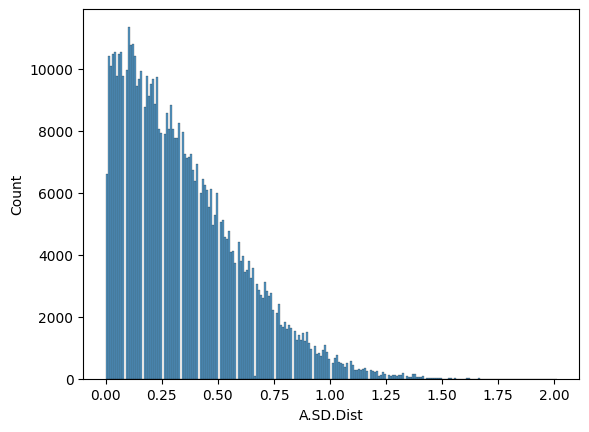

In [22]:
sns.histplot(data=df, x="A.SD.Dist")

<Axes: xlabel='V.SD.Dist', ylabel='Count'>

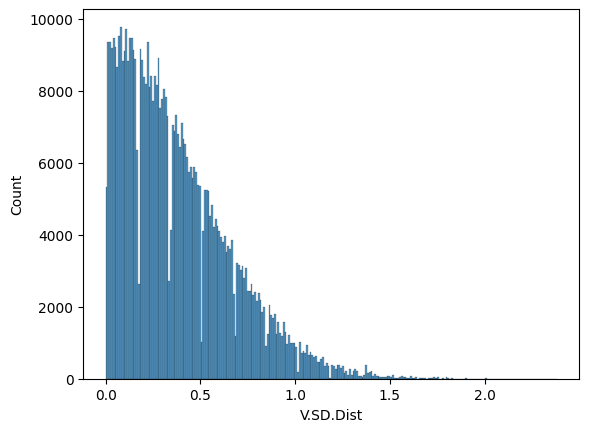

In [23]:
sns.histplot(data=df, x="V.SD.Dist")

<Axes: xlabel='D.SD.Dist', ylabel='Count'>

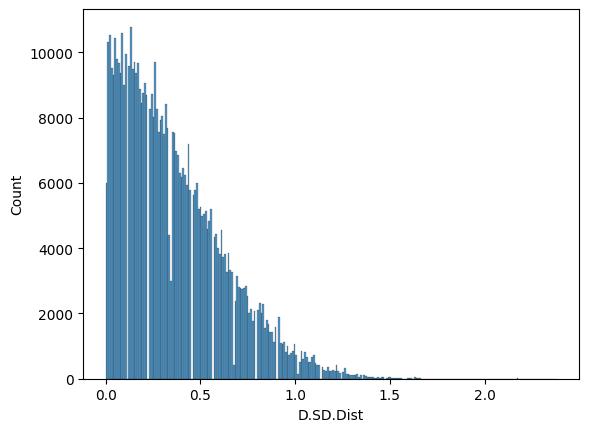

In [24]:
sns.histplot(data=df, x="D.SD.Dist")

<Axes: xlabel='Conc.SD.Dist', ylabel='Count'>

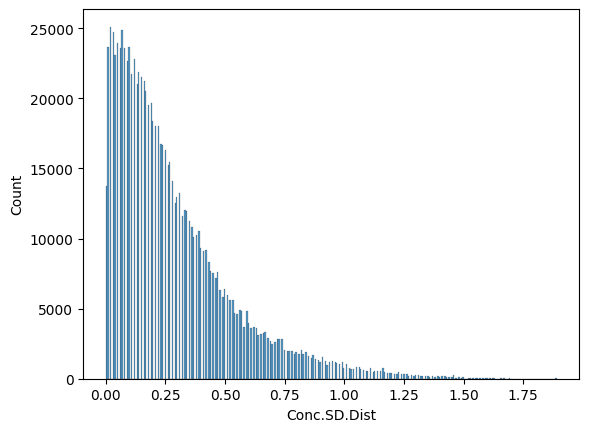

In [25]:
sns.histplot(data=df, x="Conc.SD.Dist")

<Axes: xlabel='A.Dist', ylabel='Count'>

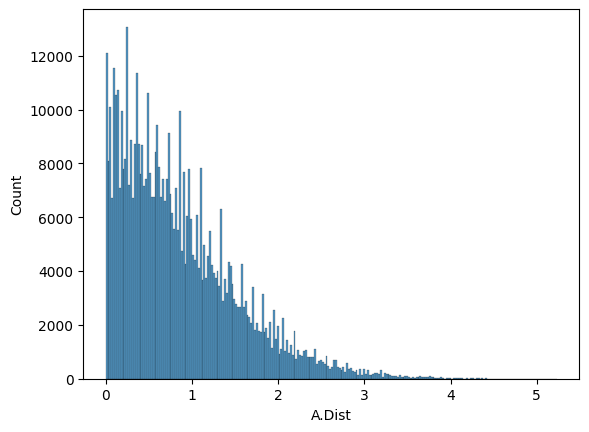

In [26]:
sns.histplot(data=df, x="A.Dist")

<Axes: xlabel='V.Dist', ylabel='Count'>

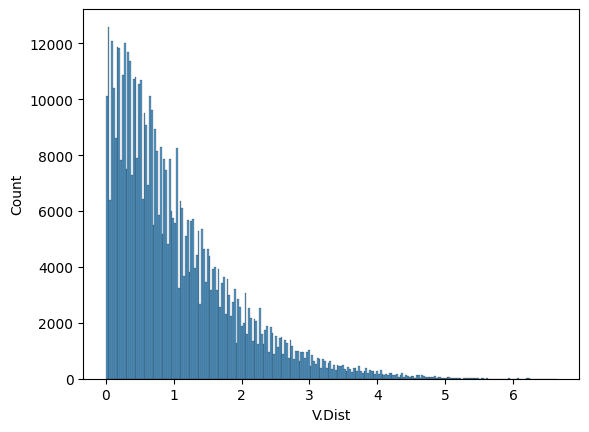

In [27]:
sns.histplot(data=df, x="V.Dist")

<Axes: xlabel='D.Dist', ylabel='Count'>

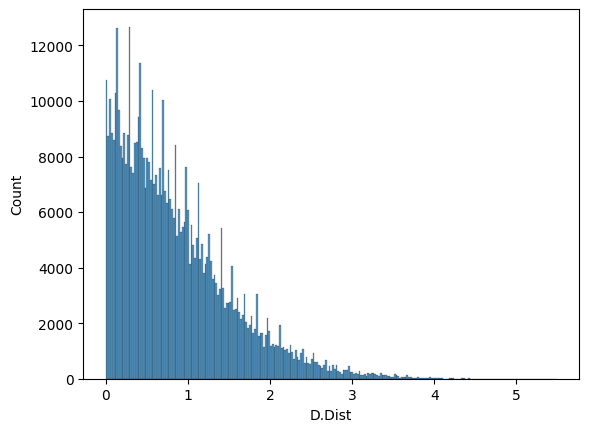

In [28]:
sns.histplot(data=df, x="D.Dist")

<Axes: xlabel='Conc.Dist', ylabel='Count'>

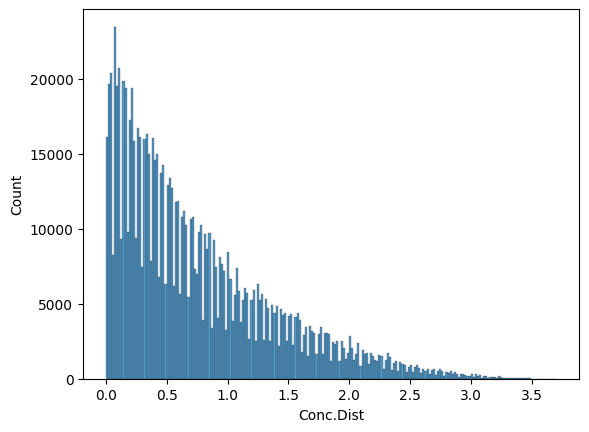

In [29]:
sns.histplot(data=df, x="Conc.Dist")

In [67]:
df["Conc.Dist"] = df["Conc.Dist"].abs()
df["A.Dist"]=df["A.Dist"].abs()
df["V.Dist"]=df["V.Dist"].abs()
df["D.Dist"]=df["D.Dist"].abs()

In [56]:
df =df.drop_duplicates(subset=["SENSE_LEMMA", "LANG", "COLEX"])

# Correlate conc and val dist for Colexification, it is not obviously correlated.

In [126]:
def corr_conc_aff(df,f0="A",f1="Conc"):
    for lang in list(set(df["lang"].tolist())):
        df_lang = df[df["lang"]==lang]
        df_lang = df_lang.dropna(subset=[f"{f1}.Dist", f"{f0}.Dist"])[[f"{f1}.Dist", f"{f0}.Dist"]]
        corr = df_lang.corr().at[f"{f1}.Dist", f"{f0}.Dist"]
        
        if len(df_lang)>100:
            if corr > 0.15 or corr <-0.15:
                print(f"{lang} -> {len(df_lang)}")
                print(corr)


In [127]:
def corr_conc_aff_all(df_lang,f0="A",f1="Conc"):
    df_lang = df_lang.dropna(subset=[f"{f1}.Dist", f"{f0}.Dist"])[[f"{f1}.Dist", f"{f0}.Dist"]]
    print(len(df_lang))
    corr = df_lang.corr().at[f"{f1}.Dist", f"{f0}.Dist"]
    print(corr)

In [128]:
corr_conc_aff_all(df, "A", "D")

492562
0.08288946031374365


In [129]:
corr_conc_aff_all(df, "V", "D")

492562
0.40880827418581955


In [130]:
corr_conc_aff_all(df, "V", "A")

492562
0.17262966749910488


In [131]:
corr_conc_aff_all(df, "Conc", "A")

483364
0.022125659485699514


In [132]:
corr_conc_aff_all(df, "Conc", "D")

483364
0.05474053753033722


In [133]:
corr_conc_aff_all(df, "Conc", "V")

483364
0.05855910209167794


In [135]:
corr_conc_aff(df, "A", "Conc")

In [134]:
corr_conc_aff(df, "D", "Conc")

te -> 195
0.2454957950066545
gd -> 411
0.21489951411952726
kk -> 105
0.15397689372793172
grc -> 103
0.2529868043361522
mn -> 103
0.17755624801301054
br -> 177
-0.16880401455183952


In [136]:
corr_conc_aff(df, "V", "Conc")

te -> 195
0.3289078421847178
ia -> 106
0.17608017430935716
gd -> 411
0.1659581617584926
pl -> 3310
0.15655331526025146
ta -> 443
0.26765013521977293


In [137]:
corr_conc_aff(df, "V", "A")

af -> 2018
0.1706993602671165
fa -> 7617
0.16748612731628923
tg -> 151
0.2551626918154975
tr -> 3231
0.16055645342473185
ru -> 3002
0.17145695918862783
vi -> 3071
0.16893685609730094
ko -> 8497
0.17314092971341288
ia -> 107
0.29594884798347865
ga -> 30062
0.15619353853916415
pt -> 20912
0.17988605914069472
grc -> 108
0.23294909439688086
mi -> 436
0.24374982606834475
he -> 2097
0.1653038581872683
uk -> 1614
0.16089274691081398
th -> 2392
0.15544127052886073
mn -> 105
0.15265039601129518
be -> 199
0.3151243202554607
eu -> 8292
0.1601707912708081
sk -> 6470
0.1529681877644612
de -> 4795
0.19663796429997035
ar -> 23376
0.2692699019439847
ms -> 54087
0.16870696452987383
es -> 21342
0.15869536509257653
hy -> 325
0.19241386492712043
br -> 179
0.2790121940994902
bn -> 167
0.2803456330828185
cs -> 2115
0.1745633452859986
da -> 3051
0.15601942052680612
lv -> 1456
0.17471380370516257
sl -> 27717
0.2471550454094005
id -> 53923
0.16692263370181393
sv -> 3731
0.17350715040946746
sr -> 1209
0.1869605

In [138]:
corr_conc_aff(df, "D", "A")

ar -> 23376
0.1556680758340083
ky -> 121
-0.19450269718572527
sl -> 27717
0.1549478953874308


In [139]:
corr_conc_aff(df, "D", "V")

af -> 2018
0.3839745690777171
fa -> 7617
0.3859185912072417
zh -> 10771
0.3921797394971178
tg -> 151
0.2340763910619512
tr -> 3231
0.3428774386313272
az -> 182
0.35451030215640544
km -> 143
0.3387952559925201
te -> 197
0.4970548495573819
ru -> 3002
0.3720620573333656
vi -> 3071
0.34527260677506916
is -> 4716
0.3700504781722302
ko -> 8497
0.38380990591803166
bg -> 3853
0.37196586563935097
gd -> 418
0.3823730358158086
la -> 463
0.36987279670496204
ga -> 30062
0.4286550280667855
kk -> 106
0.3580479646740635
pt -> 20912
0.3963869027052338
grc -> 108
0.2383469366595161
mi -> 436
0.36405029476952705
he -> 2097
0.424626635489642
uk -> 1614
0.36601533020626625
th -> 2392
0.3159318020387661
el -> 4544
0.3678284330727737
mn -> 105
0.39473974604784556
be -> 199
0.25012505857667006
mk -> 260
0.18360692580655827
eu -> 8292
0.4163154320616884
uz -> 103
0.4812293232519989
cy -> 1824
0.3738412005860878
sk -> 6470
0.38079235777046305
de -> 4795
0.3477732664731571
tl -> 2329
0.39251919726186735
ar -> 23

In [69]:
for lang in list(set(df["lang"].tolist())):
    df_lang = df[df["lang"]==lang]
    df_lang = df_lang.dropna(subset=["Conc.M.1", "Conc.M.2", "C1.V.Mean.Sum", "C2.V.Mean.Sum"])[["Conc.Dist", "A.Dist"]]
    if len(df_lang)>100:
        print(f"{lang} -> {len(df_lang)}")
        corr = df_lang.corr().at["Conc.Dist", "A.Dist"]
        if corr > 0.15 or corr <-0.15:
            print(corr)
          

af -> 493
fa -> 2530
zh -> 3635
tr -> 1224
km -> 120
ru -> 1675
vi -> 987
is -> 2547
ko -> 5378
bg -> 1535
gd -> 136
ga -> 12877
pt -> 7252
he -> 187
uk -> 612
th -> 1572
el -> 890
mk -> 222
eu -> 1075
cy -> 879
sk -> 1167
de -> 3225
tl -> 810
ar -> 6596
ms -> 5241
es -> 10181
hy -> 272
nn -> 111
-0.17103561968651376
fr -> 13681
lt -> 446
cs -> 1409
da -> 1254
lv -> 225
sl -> 11322
id -> 9985
pl -> 2637
sv -> 817
hu -> 2026
ka -> 539
sq -> 655
hi -> 1647
no -> 276
ro -> 3404
ca -> 1480
ja -> 735
ta -> 229
gl -> 1166
fi -> 9556
eo -> 271
it -> 10348
sh -> 126
nl -> 6702
en -> 5653
mt -> 285


In [159]:
df["Aff.Dist.Mean"]= df[[ "D.SD.Dist", "A.SD.Dist", "V.SD.Dist",  "Conc.SD.Dist"]].mean(axis=1)

<Axes: xlabel='Aff.Dist.Mean', ylabel='Count'>

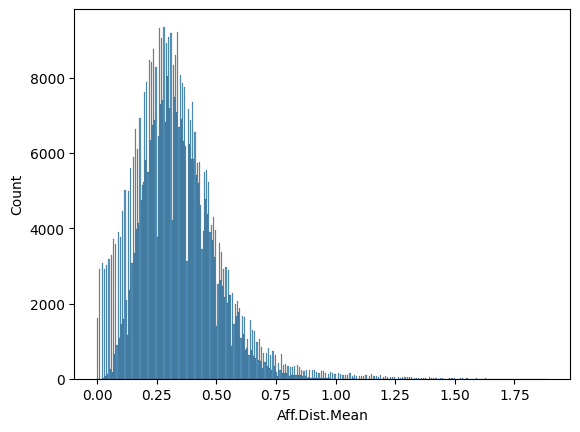

In [160]:
sns.histplot(data=df, x="Aff.Dist.Mean")

In [161]:
# df.to_csv("../data/aff+conc/colex_aff_conc_dist.csv", index=False)

In [8]:
df = pd.read_csv("../data/aff+conc/colex_aff_conc_dist.csv")

In [9]:
df

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,Conc.SD.1,Conc.SD.2,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,diff,Conc.Dist,V.Dist,D.Dist,A.Dist,Conc.Percent_Known.1,Conc.Percent_Known.2,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.SD.Dist,Aff.Dist.Mean
0,protubérance,FR,bulge#n#1,gnarl#v#1,bulge,gnarl,3.92,3.13,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,bulge~gnarl,1.32,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.79,NaN,NaN,NaN,1.00,0.88,NaN,NaN,NaN,0.03,0.03
1,enflure,FR,bulge#n#1,swelling#n#1,bulge,swelling,3.92,4.13,fr,fra,French,enflure_fra,ɑ̃ f l y ʁ,48.0000,2.0000,bulge~swelling,1.32,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.21,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,0.40,0.40
2,tyran,FR,dictatorship#n#1,taskmaster#n#1,dictatorship,taskmaster,2.77,3.46,fr,fra,French,tyran_fra,t i ʁ ɑ̃,48.0000,2.0000,dictatorship~taskmaster,1.48,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.69,NaN,NaN,NaN,1.00,0.86,NaN,NaN,NaN,0.10,0.10
3,tiran,RO,authoritarian#n#1,tyrant#n#1,authoritarian,tyrant,2.08,3.80,ro,ron,Romanian; Moldavian; Moldovan,tiran_ron,t i r a n,46.3913,24.2256,authoritarian~tyrant,1.41,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.72,NaN,NaN,NaN,0.96,1.00,NaN,NaN,NaN,0.04,0.04
4,tiran,RO,authoritarian#n#1,dictatorship#n#1,authoritarian,dictatorship,2.08,2.77,ro,ron,Romanian; Moldavian; Moldovan,tiran_ron,t i r a n,46.3913,24.2256,authoritarian~dictatorship,1.41,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.69,NaN,NaN,NaN,0.96,1.00,NaN,NaN,NaN,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615145,turut_campur,ID,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,id,NaN,NaN,NaN,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615146,turut_campur,MS,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,ms,NaN,NaN,NaN,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615147,turun_tangan,ID,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,id,NaN,NaN,NaN,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615148,turun_tangan,MS,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,ms,NaN,NaN,NaN,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25


# Get Phonemes, lang pron

In [181]:
with open("../data/phon/wikipron/data/scrape/lib/languages.json") as f:
    langs = json.load(f)

langs_colex = set(df.lang.tolist())

langs_pron= list()
lang_dict = dict()
for lang, d in langs.items():
    langs_pron.append(lang)
    lang_dict[lang] = (lang, d["iso639_name"])
    
    langs_pron.append(d["wiktionary_code"])
    lang_dict[d["wiktionary_code"]] = (lang, d["iso639_name"])
    
    if "dialect" in d:
        
        dia_d = d["dialect"]
        for k, v in dia_d.items():
            lang_dict[k]= (lang, v)
            langs_pron.append(k)
            

In [200]:
lang_dict["de"]

('deu', 'German')

In [195]:
lang_dict["deu"]

('deu', 'German')

In [203]:
"de" in langs_pron

True

In [182]:
len(langs_pron), len(langs_colex), len(langs_colex.intersection(set(langs_pron)))

(543, 311, 171)

In [183]:
df_inter = df[df["lang"].isin(langs_pron)]

In [206]:
df_inter[df_inter["lang"]=="de"][df_inter["SENSE_LEMMA"]=="gefängnis"]

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,Conc.SD.1,Conc.SD.2,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,diff,Conc.Dist,V.Dist,D.Dist,A.Dist,Conc.Percent_Known.1,Conc.Percent_Known.2,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.SD.Dist,Aff.Dist.Mean
475228,gefängnis,DE,jail#n#1,prison#n#1,jail,prison,4.83,4.68,de,deu,German,NaN,NaN,NaN,NaN,jail~prison,0.38,0.67,jail,1.91,1.44,870.0,4.47,2.5,38.0,3.91,2.91,23.0,prison,1.94,1.55,18.0,5.1,2.34,21.0,3.54,2.65,52.0,True,0.15,0.03,0.37,0.63,1.0,1.0,0.26,0.16,0.11,0.29,0.205


In [207]:
df_inter["LANG_PRON"] = df_inter["lang"].apply(lambda x: lang_dict[x][0])
df_inter["LANG_NAME"] = df_inter["lang"].apply(lambda x: lang_dict[x][1])

In [208]:
df_inter["lemma_lang"]= df_inter["SENSE_LEMMA"]+"_"+df_inter["LANG_PRON"]

In [209]:
len(df_inter)

604277

In [187]:
pron_folder = "../data/phon/preprocessed"

In [188]:
import glob, os

In [189]:
lemma_dict = {}
for file in glob.glob(f"{pron_folder}/*.tsv"):
    print(file)
    lang = os.path.basename(file).replace(".tsv", "")
    df_pron = pd.read_csv(file, sep="\t")
    
    for lemma, pron in zip(df_pron["lemma"], df_pron["pron"]):
        
        try:
            lemma = lemma.replace(" ", "_")
            lemma_dict[lemma+"_"+lang]=pron
        except Exception:
            print(lemma, lang)
        

../data/phon/preprocessed/wau.tsv
../data/phon/preprocessed/nno.tsv
../data/phon/preprocessed/pjt.tsv
../data/phon/preprocessed/scn.tsv
../data/phon/preprocessed/slv.tsv
../data/phon/preprocessed/sme.tsv
../data/phon/preprocessed/chb.tsv
../data/phon/preprocessed/ary.tsv
../data/phon/preprocessed/ofs.tsv
nan ofs
../data/phon/preprocessed/stq.tsv
../data/phon/preprocessed/dlm.tsv
../data/phon/preprocessed/huu.tsv
../data/phon/preprocessed/ces.tsv
../data/phon/preprocessed/zha.tsv
../data/phon/preprocessed/sco.tsv
../data/phon/preprocessed/lat.tsv
../data/phon/preprocessed/ppl.tsv
../data/phon/preprocessed/nci.tsv
../data/phon/preprocessed/nav.tsv
../data/phon/preprocessed/nld.tsv
../data/phon/preprocessed/yor.tsv
../data/phon/preprocessed/lwl.tsv
../data/phon/preprocessed/ban.tsv
../data/phon/preprocessed/lav.tsv
../data/phon/preprocessed/hts.tsv
../data/phon/preprocessed/mga.tsv
../data/phon/preprocessed/mfe.tsv
../data/phon/preprocessed/arz.tsv
../data/phon/preprocessed/dng.tsv
../dat

In [170]:
len(lemma_dict)

1882240

In [210]:
df_inter["PRON"] = df_inter["lemma_lang"].apply(lambda x: lemma_dict.get(x, np.NaN))

In [211]:
df_inter

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,Conc.SD.1,Conc.SD.2,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,diff,Conc.Dist,V.Dist,D.Dist,A.Dist,Conc.Percent_Known.1,Conc.Percent_Known.2,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.SD.Dist,Aff.Dist.Mean
0,protubérance,FR,bulge#n#1,gnarl#v#1,bulge,gnarl,3.92,3.13,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,bulge~gnarl,1.32,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.79,NaN,NaN,NaN,1.00,0.88,NaN,NaN,NaN,0.03,0.03
1,enflure,FR,bulge#n#1,swelling#n#1,bulge,swelling,3.92,4.13,fr,fra,French,enflure_fra,ɑ̃ f l y ʁ,48.0000,2.0000,bulge~swelling,1.32,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.21,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,0.40,0.40
2,tyran,FR,dictatorship#n#1,taskmaster#n#1,dictatorship,taskmaster,2.77,3.46,fr,fra,French,tyran_fra,t i ʁ ɑ̃,48.0000,2.0000,dictatorship~taskmaster,1.48,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.69,NaN,NaN,NaN,1.00,0.86,NaN,NaN,NaN,0.10,0.10
3,tiran,RO,authoritarian#n#1,tyrant#n#1,authoritarian,tyrant,2.08,3.80,ro,ron,Romanian; Moldavian; Moldovan,tiran_ron,t i r a n,46.3913,24.2256,authoritarian~tyrant,1.41,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.72,NaN,NaN,NaN,0.96,1.00,NaN,NaN,NaN,0.04,0.04
4,tiran,RO,authoritarian#n#1,dictatorship#n#1,authoritarian,dictatorship,2.08,2.77,ro,ron,Romanian; Moldavian; Moldovan,tiran_ron,t i r a n,46.3913,24.2256,authoritarian~dictatorship,1.41,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.69,NaN,NaN,NaN,0.96,1.00,NaN,NaN,NaN,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615145,turut_campur,ID,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,id,ind,Indonesian,turut_campur_ind,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615146,turut_campur,MS,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,ms,msa,Malay (macrolanguage),turut_campur_msa,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615147,turun_tangan,ID,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,id,ind,Indonesian,turun_tangan_ind,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25
615148,turun_tangan,MS,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,ms,msa,Malay (macrolanguage),turun_tangan_msa,NaN,NaN,NaN,interfere~intervene,1.27,1.25,interfere,3.94,1.86,18.0,4.33,2.78,21.0,4.71,2.24,28.0,intervene,5.21,1.4,19.0,4.48,2.48,23.0,5.82,2.02,28.0,True,0.02,1.27,1.11,0.15,1.00,1.00,0.22,0.3,0.46,0.02,0.25


In [213]:
df_inter.dropna(subset=["PRON"], inplace=True)

In [214]:
len(df_inter)

341653

In [212]:
df_inter[df_inter["SENSE_LEMMA"]=="gefängnis"]

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,Conc.SD.1,Conc.SD.2,C1.lemma,C1.V.Mean.Sum,C1.V.SD.Sum,C1.V.Rat.Sum,C1.A.Mean.Sum,C1.A.SD.Sum,C1.A.Rat.Sum,C1.D.Mean.Sum,C1.D.SD.Sum,C1.D.Rat.Sum,C2.lemma,C2.V.Mean.Sum,C2.V.SD.Sum,C2.V.Rat.Sum,C2.A.Mean.Sum,C2.A.SD.Sum,C2.A.Rat.Sum,C2.D.Mean.Sum,C2.D.SD.Sum,C2.D.Rat.Sum,diff,Conc.Dist,V.Dist,D.Dist,A.Dist,Conc.Percent_Known.1,Conc.Percent_Known.2,D.SD.Dist,A.SD.Dist,V.SD.Dist,Conc.SD.Dist,Aff.Dist.Mean
475228,gefängnis,DE,jail#n#1,prison#n#1,jail,prison,4.83,4.68,de,deu,German,gefängnis_deu,ɡ ə f ɛ ŋ n ɪ s,NaN,NaN,jail~prison,0.38,0.67,jail,1.91,1.44,870.0,4.47,2.5,38.0,3.91,2.91,23.0,prison,1.94,1.55,18.0,5.1,2.34,21.0,3.54,2.65,52.0,True,0.15,0.03,0.37,0.63,1.0,1.0,0.26,0.16,0.11,0.29,0.205


In [217]:
df_inter.to_csv("../data/aff+conc/colex_aff_conc_dist_pron.csv", index=False)

In [218]:
df =df_inter

In [225]:
valdict1 = dict()
for lemma, v_mean, v_sd, a_mean, a_sd, d_mean, d_sd in zip(df["C1.lemma"], df["C1.V.Mean.Sum"], df["C1.V.SD.Sum"], 
                                                           df["C1.A.Mean.Sum"], df["C1.A.SD.Sum"], df["C1.D.Mean.Sum"], df["C1.D.SD.Sum"]):
    valdict1[lemma] = ( v_mean, v_sd, a_mean, a_sd, d_mean, d_sd)
                                                                       

In [226]:
valdict2 = dict()
for lemma, v_mean, v_sd, a_mean, a_sd, d_mean, d_sd in zip(df["C2.lemma"], df["C2.V.Mean.Sum"], df["C2.V.SD.Sum"], 
                                                           df["C2.A.Mean.Sum"], df["C2.A.SD.Sum"], df["C2.D.Mean.Sum"], df["C2.D.SD.Sum"]):
    valdict2[lemma] = ( v_mean, v_sd, a_mean, a_sd, d_mean, d_sd)                                                  

In [227]:
len(valdict1), len(valdict2)

(8272, 8557)

In [228]:
valdict1.update(valdict2), len(valdict1)

(None, 9549)

In [240]:
concdict1 = dict()
for lemma, conc,conc_sd in zip(df["C1"], df["Conc.M.1"], df["Conc.SD.1"]):
    concdict1[lemma] = (conc, conc_sd)

concdict2 = dict()
for lemma, conc, conc_sd in zip(df["C2"], df["Conc.M.2"], df["Conc.SD.2"]):
    concdict2[lemma] = (conc,conc_sd)
    

In [241]:
concdict1.update(concdict2)

In [242]:
len(concdict1)

19059

In [243]:
lemmas,langs, prons, colex, concs, concsds, vmeans,vsds, ameans, asds, dmeans, dsds  = [],[],[],[],[],[],[],[],[],[],[],[]
for x, group in df.groupby(["SENSE_LEMMA", "LANG_PRON", "PRON", "COLEX"]):
    lemmas.append(x[0])
    langs.append(x[1])
    prons.append(x[2])
    colex.append(x[3])
    
    concepts = list(set(group["C1"].tolist()+group["C2"].tolist()))
    
    concs_ls, concsd_ls, vmeans_ls, vsds_ls, ameans_ls, asds_ls, dmeans_ls, dsds_ls  = [],[],[],[],[],[],[],[]
    for concept in concepts:
        if concept in valdict1:
            vmean, vsd, amen, asd, dmean, dsd = valdict1[concept]
            vmeans_ls.append(vmean)
            vsds_ls.append(vsd)
            ameans_ls.append(amen)
            asds_ls.append(asd)
            dmeans_ls.append(dmean)
            dsds_ls.append(dsd)
        if concept in concdict1:
            conc, conc_sd = concdict1[concept]
            concs_ls.append(conc)
            concsd_ls.append(conc_sd)
            
        
    vmeans.append(np.mean(vmeans_ls))
    vsds.append(np.mean(vsds_ls))
    ameans.append(np.mean(ameans_ls))
    asds.append(np.mean(asds_ls))
    dmeans.append(np.mean(dmeans_ls))
    dsds.append(np.mean(dsds_ls))
    concs.append(np.mean(concs_ls))
    concsds.append(np.mean(concsd_ls))
    

In [244]:
phonedf = pd.DataFrame.from_dict({"SENSE_LEMMA": lemmas, "LANG_PRON":langs, "PRON":prons, "COLEX":colex, "Conc.Mean":concs, "Conc.SD": concsds, "V.Mean":vmeans, "V.SD": vsds, "A.Mean": ameans, "A.SD":asds, 
                                 "D.Mean":dmeans, "D.SD":dsds })

In [254]:
phonedf["Aff.Mean"]= phonedf[["V.Mean", "A.Mean", "D.Mean"]].mean(axis=1)

In [258]:
phonedf["Aff.all.Mean"]=(phonedf["Aff.Mean"]/9 +phonedf["Conc.Mean"]/5)/2

<Axes: xlabel='Aff.all.Mean', ylabel='Count'>

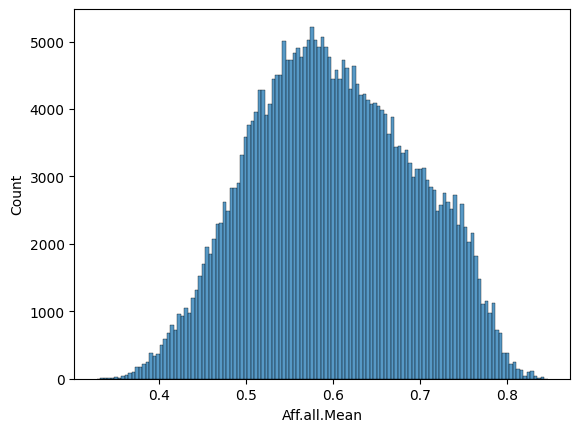

In [259]:
sns.histplot(data=phonedf, x="Aff.all.Mean")

<Axes: xlabel='Conc.Mean', ylabel='Count'>

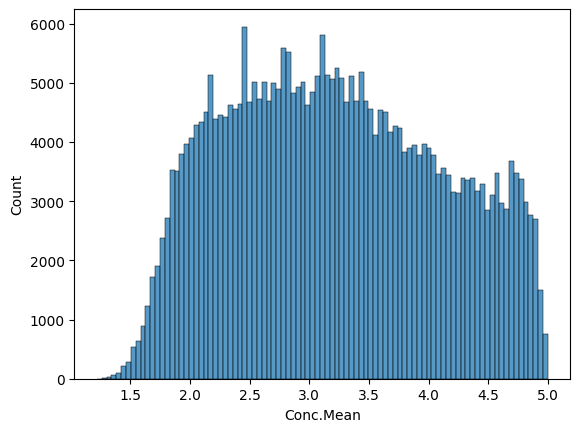

In [247]:
sns.histplot(data=phonedf, x="Conc.Mean")

<Axes: xlabel='Aff.Mean', ylabel='Count'>

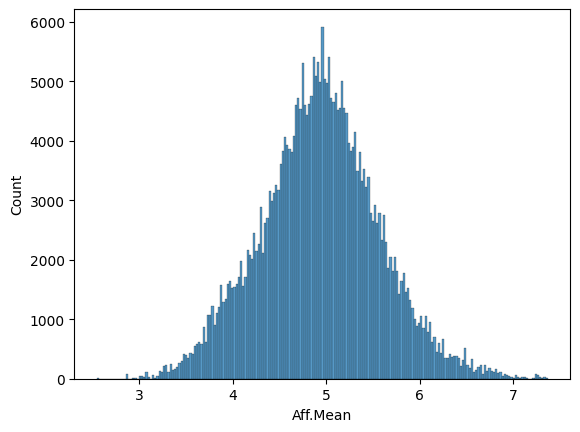

In [255]:
sns.histplot(data=phonedf, x="Aff.Mean")

<Axes: xlabel='V.Mean', ylabel='Count'>

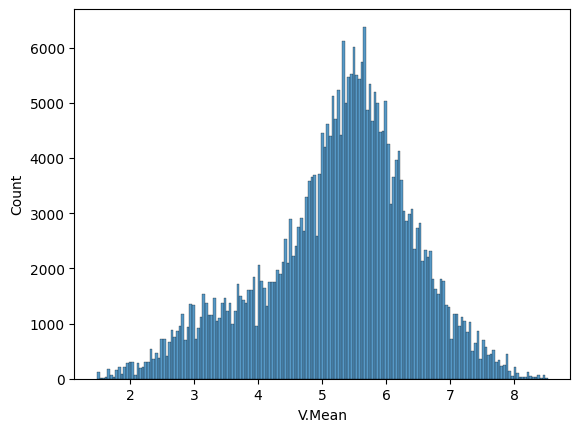

In [248]:
sns.histplot(data=phonedf, x="V.Mean")

<Axes: xlabel='D.Mean', ylabel='Count'>

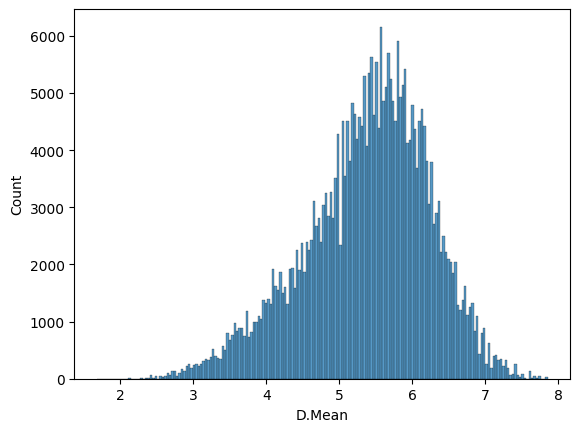

In [249]:
sns.histplot(data=phonedf, x="D.Mean")

<Axes: xlabel='A.Mean', ylabel='Count'>

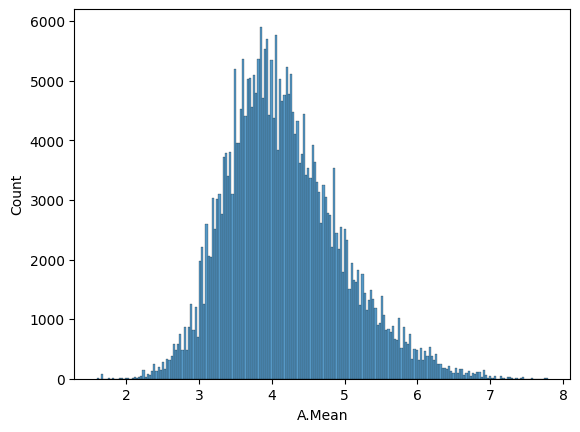

In [251]:
sns.histplot(data=phonedf, x="A.Mean")

In [7]:
phonedf=pd.read_csv("../data/aff+conc/phone_aff_conc_features.csv")

In [8]:
phonedf

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,NORM_PRON,INIT_NORM_PRON,INIT_PRON,init_syl,init_son,init_cons,init_cont,init_delrel,init_lat,init_nas,init_strid,init_voi,init_sg,init_cg,init_ant,init_cor,init_distr,init_lab,init_hi,init_lo,init_back,init_round,init_velaric,init_tense,init_long,init_hitone,init_hireg,syl,son,cons,cont,delrel,lat,nas,strid,voi,sg,cg,ant,cor,distr,lab,hi,lo,back,round,velaric,tense,long,hitone,hireg,last_syl,last_son,last_cons,last_cont,last_delrel,last_lat,last_nas,last_strid,last_voi,last_sg,last_cg,last_ant,last_cor,last_distr,last_lab,last_hi,last_lo,last_back,last_round,last_velaric,last_tense,last_long,last_hitone,last_hireg
0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,3.670,2.630,6.320,2.480,5.163333,0.490352,NaN,NaN,ə,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,3.650,2.250,4.920,2.260,4.840000,0.654389,a,a,ɒ,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0
2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,3.220,2.180,4.480,1.990,3.750000,0.481333,a,a,ɒ,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0
3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,3.550,2.240,4.320,2.810,3.253333,0.486241,a,a,ɒ,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0
4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,4.390,2.630,5.680,2.160,5.770000,0.696056,a,a,ɒ,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,3.375,2.535,5.035,2.615,4.601667,0.632148,urruns,u,u,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.333333,0.833333,0.666667,0.833333,0.0,0.000000,0.166667,0.000000,0.833333,0.0,0.0,0.666667,0.666667,0.0,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,0.333333,0.000000,0.0,0.0,-1.0,-1.0,1.0,1

In [261]:
import unidecode

# Define mapping table for non-standard IPA characters
ipa_mapping = {
    "ɾ": "r",
    "ɕ": "ʃ",
    # add more mappings as needed
}

def normalize_ipa(ipa_string):
    # Convert to lowercase and remove diacritics
    ipa_string = unidecode.unidecode(ipa_string.lower())
    
    # Map any non-standard IPA characters to their standardized forms
    for key, value in ipa_mapping.items():
        ipa_string = ipa_string.replace(key, value)
    
    # Separate suprasegmental features from phonemes and remove non-valid integers
    phonemes = []
    tones = []
    for char in ipa_string:
        if char.isdigit() and int(char) in range(1, 6):
            tones.append(char)
        elif char.isalpha():
            phonemes.append(char)
    # Normalize tone markers to consistent format
    if tones:
        tones = [f"{int(tone)}" for tone in tones]
    
    # Join phonemes and tones back into a single string
    normalized_ipa = "".join(phonemes + tones)
    
    return normalized_ipa


In [9]:
import panphon
ft = panphon.FeatureTable()

In [266]:
phonedf["NORM_PRON"] = phonedf["PRON"].parallel_apply(normalize_ipa)

In [268]:
phonedf["INIT_NORM_PRON"] = phonedf["NORM_PRON"].str[0]

In [269]:
phonedf["INIT_PRON"] = phonedf["PRON"].str[0]

In [18]:
def get_phon_features(phone):
    r = ft.word_to_vector_list(phone, numeric=True)
    r_arr = np.array(r)
    seg_len = r_arr.shape[0]
    
    r_initials = r[0]
    r_last = r[-1]
    r_values = np.count_nonzero(r_arr==1, axis=0)
    cons = np.count_nonzero(r_arr== 1, axis=0)[2]
    vowels = seg_len - cons
   
    print(vowels)
    print(cons)
    print(seg_len)
    # /seg_len
    
    rs = np.concatenate(([seg_len], r_initials, r_values,[vowels], r_last), axis=0)
    return pd.Series(rs)

In [19]:
get_phon_features("s k iː m a")

2
3
5


0     5
1    -1
2    -1
3     1
4     1
     ..
69   -1
70    1
71   -1
72    0
73    0
Length: 74, dtype: int64

In [31]:
features = ["syl", "son", "cons", "cont", "delrel", "lat", "nas", "strid", "voi", "sg", "cg", "ant", 
            "cor", "distr", "lab", "hi", "lo", "back", "round", "velaric", "tense", "long", "hitone", "hireg", "vowel"]

In [32]:
Initial_features = [f"init_{x}" for x in features]
last_features = [f"last_{x}" for x in features]

all_features =["SEG_LEN"]+ Initial_features+features+last_features

In [ ]:
phonedf[all_features]= phonedf["PRON"].parallel_apply(get_phon_features)

In [28]:
phonedf

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,NORM_PRON,INIT_NORM_PRON,INIT_PRON,init_syl,init_son,init_cons,init_cont,init_delrel,init_lat,init_nas,init_strid,init_voi,init_sg,init_cg,init_ant,init_cor,init_distr,init_lab,init_hi,init_lo,init_back,init_round,init_velaric,init_tense,init_long,init_hitone,init_hireg,syl,son,cons,cont,delrel,lat,nas,strid,voi,sg,cg,ant,cor,distr,lab,hi,lo,back,round,velaric,tense,long,hitone,hireg,last_syl,last_son,last_cons,last_cont,last_delrel,last_lat,last_nas,last_strid,last_voi,last_sg,last_cg,last_ant,last_cor,last_distr,last_lab,last_hi,last_lo,last_back,last_round,last_velaric,last_tense,last_long,last_hitone,last_hireg,SEG_LEN
0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,3.670,2.630,6.320,2.480,5.163333,0.490352,NaN,NaN,ə,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,-1,1,-1,-1,-1,-1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,-1,1,-1,-1,-1,-1,0,0,1
1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,3.650,2.250,4.920,2.260,4.840000,0.654389,a,a,ɒ,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1
2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,3.220,2.180,4.480,1.990,3.750000,0.481333,a,a,ɒ,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1
3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,3.550,2.240,4.320,2.810,3.253333,0.486241,a,a,ɒ,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1
4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,4.390,2.630,5.680,2.160,5.770000,0.696056,a,a,ɒ,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,1,-1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,3.375,2.535,5.035,2.615,4.601667,0.632148,urruns,u,u,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,1,1,-1,1,1,-1,1,-1,0,0,2,5,4,5,0,0,1,0,5,0,0,4,4,0,2,2,0,2,2,0,2,0,0,0,-1,-1,1,1,-1,-1,-1,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,6
339688,𐍃𐌺𐌴𐌹𐌼𐌰,got,s k iː m a,lantern~torch,4.880,0.320,4.935,1.700,4.165,2.195,5.550,2.160,4.883333,0.759296,skima,s,s,-1,-1,1,1,-1,-1,-1,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,2,3,3,3,0,0,1,0,3,0,0,2,1,0,1,2,1,1,0,0,2,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,-1,-1,-1,1,-1,0,0,5
339689,𐍅𐌰𐌹𐌽𐌰𐌷𐍃,got,w ɛː n a h s,miserable~unhappy,2.005,1.320,2.220,1.485,5.080,2.720,3.785,2.170,3.695000,0.405778,wenahs,w,w,-1,1,-1,1,-1,-1,-1,0,1,-1,-1,-1,-1,0,1,1,-1,1,1,-1,0,-1,0,0,2,5,3,5,0,0,1,0,4,0,0,2,2,0,1,1,1,1,1,0,1,1,0,0,-1,-1,1,1,-1,-1,-1,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,6
339690,𐍅𐍉𐌸𐌴𐌹𐍃,got,w oː θ iː s,pleasant~sweet,2.775,1.020,7.505,1.445,3.525,2.720,6.410,1.965,5.813333,0.600463,wothis,w,w,-1,1,-1,1,-1,-1,-1,0,1,-1,-1,-1,-1,0,1,1,-1,1,1,-1,0,-1,0,0,2,3,2,5,0,0,0,0,3,0,0,2,2,1,1,2,0,2,2,0,2,2,0,0,-1,-1,1,1,-1,-1,-1,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,5


In [29]:
phonedf.to_csv("../data/aff+conc/phone_aff_conc_features_num.csv", index=False)